In [7]:
import pandas as pd
import numpy as np
import os
import re
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import calendar

from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('more_tweets_plus.csv')

In [9]:
df2 = df[df.tweet_clean.notnull()]

In [10]:
cv = CountVectorizer(stop_words='english')
v_tweets = cv.fit_transform(df2)
gram1 = pd.DataFrame(v_tweets.todense(), columns=cv.get_feature_names()).sum().sort_values(ascending=False)

In [11]:
df2['date'] = pd.to_datetime(df2['date'])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
df2.set_index('date')['2018-08-01']

,retweets,favorites,text,mentions,hashtags,id,permalink,tweet_clean,polarity,subjectivity,sig,log_rt,log_faves
date,,,,,,,,,,,,,
2018-08-01 19:52:00,0,0,Good Evening. We are working to address these ...,NaN,NaN,1.024805e+18,https://twitter.com/NYCTSubway/status/10248050...,good evening. we are working to address these ...,0.700000,0.600000,^JZ,0.000000,0.000000
2018-08-01 19:49:00,0,0,Good Evening. Can you tell us your location an...,NaN,NaN,1.024804e+18,https://twitter.com/NYCTSubway/status/10248044...,good evening. can you tell us your location an...,0.700000,0.600000,^JZ,0.000000,0.000000
2018-08-01 19:39:00,0,0,Thank you for reporting this information. We w...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248017...,thank you for reporting this information. we w...,0.000000,0.000000,^JZ,0.000000,0.000000
2018-08-01 19:38:00,0,0,You're very welcome and I hope you have a grea...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248015...,you're very welcome and i hope you have a grea...,0.900000,0.875000,^JZ,0.000000,0.000000
2018-08-01 19:36:00,0,0,Thank you again for reporting this. We will at...,NaN,NaN,1.024801e+18,https://twitter.com/NYCTSubway/status/10248010...,thank you again for reporting this. we will at...,0.800000,0.750000,^JZ,0.000000,0.000000
2018-08-01 19:33:00,0,0,Sorry for the unpleasant conditions. We are ma...,NaN,NaN,1.024800e+18,https://twitter.com/NYCTSubway/status/10248002...,sorry for the unpleasant conditions. we are ma...,-0.300000,0.733333,^CB,0.000000,0.000000
2018-08-01 19:29:00,0,0,Good Evening. We understand your frustration a...,NaN,NaN,1.024799e+18,https://twitter.com/NYCTSubway/status/10247993...,good evening. we understand your frustration a...,0.600000,0.550000,^JZ,0.000000,0.000000
2018-08-01 19:24:00,0,0,Thank you for the report. We will make supervi...,NaN,NaN,1.024798e+18,https://twitter.com/NYCTSubway/status/10247980...,thank you for the report. we will make supervi...,0.250000,0.250000,^CB,0.000000,0.000000
2018-08-01 19:17:00,0,0,Sorry for the unpleasant conditions. We will m...,NaN,NaN,1.024796e+18,https://twitter.com/NYCTSubway/status/10247963...,sorry for the unpleasant conditions. we will m...,-0.175000,0.575000,^CB,0.000000,0.000000


In [13]:
start = dt.date(2018, 7, 1)
end = dt.date(2018,8,1)

In [14]:
df2.set_index('date').loc['2018-07-01':'2018-08-01']['tweet_clean']

date
2018-08-01 19:52:00    good evening. we are working to address these ...
2018-08-01 19:49:00    good evening. can you tell us your location an...
2018-08-01 19:39:00    thank you for reporting this information. we w...
2018-08-01 19:38:00    you're very welcome and i hope you have a grea...
2018-08-01 19:36:00    thank you again for reporting this. we will at...
2018-08-01 19:33:00    sorry for the unpleasant conditions. we are ma...
2018-08-01 19:29:00    good evening. we understand your frustration a...
2018-08-01 19:24:00    thank you for the report. we will make supervi...
2018-08-01 19:17:00    sorry for the unpleasant conditions. we will m...
2018-08-01 19:16:00    good evening. there are no reported delays at ...
2018-08-01 19:13:00    thank you for the report. we will make supervi...
2018-08-01 19:13:00    thank you for this information. were you able ...
2018-08-01 19:11:00    good evening, hayley. we have disinfected the ...
2018-08-01 19:02:00    thank you for the repor

In [15]:
stops = nltk.corpus.stopwords.words('english')
train_words = ['train', 'trains', 'st', 'av', 'http']
stops = stops+train_words

In [16]:
def lemma(t, lem=None):
    if (lem is None) or (type(lem) != WordNetLemmatizer):
        lem = WordNetLemmatizer()
    t_lem = []
    for w in t.split():
        t_lem.append(lem.lemmatize(w))
    return ' '.join(t_lem)

In [17]:
def stem(t, stem=None):
    if (stem is None):
        stem = PorterStemmer()
    t_stem = []
    for w in t.split():
        t_stem.append(stem.stem(w))
    return ' '.join(t_stem)

In [18]:
def span_vec(start, end, data=df2, pro='stem'):
    tweets = data.set_index('date').loc[start:end]['tweet_clean']
    if pro == 'stem':
        t_pro = tweets.map(stem)
    elif pro == 'lem':
        t_pro = tweets.map(lemma)
    else:
        t_pro = tweets
    cv = CountVectorizer(stop_words=stops)
    v_tweets = cv.fit_transform(t_pro)
    gram = pd.DataFrame(v_tweets.todense(), columns=cv.get_feature_names()).sum().sort_values(ascending=False)
    return gram

In [19]:
def vecs_top_n(n=25, s='2017-01-01', freq='W', pds=83, data=df2, pro='stem'):
    d_range = pd.date_range(s, periods=pds, freq=freq)
    df = pd.DataFrame()
    start = d_range[0].strftime('%Y-%m-%d')
    for l in range(0, len(d_range)-1):
        if l % 5 == 0:
            clear_output()
        end = d_range[l+1].strftime('%Y-%m-%d')
        gram = span_vec(start, end, data=data, pro=pro)
        df_gram = pd.DataFrame(gram).reset_index().rename(columns={'index':'word',0:'count'}).iloc[0:n,:]
        df_gram['date'] = start
        df = pd.concat([df, df_gram])
        start = end
        print(start)
    return df
    

In [20]:
d_range = pd.date_range('2017-01-01', periods=19, freq='M')

In [21]:
d_range[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [22]:
d_range[0].strftime('%Y-%m-%d')

'2017-01-31'

In [23]:
pd.date_range('2017-01-01', periods=83, freq='W')

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14',
               '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11',
               '2017-06-18', '2017-06-25', '2017-07-02', '2017-07-09',
               '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06',
               '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03',
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26',
               '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24',
               '2017-12-31', '2018-01-07', '2018-01-14', '2018-01-21',
      

In [26]:
top25 = vecs_top_n(pro=None)

2018-07-22
2018-07-29


In [27]:
top100 = vecs_top_n(n=100, pro=None)

2018-07-22
2018-07-29


In [28]:
top300 = vecs_top_n(n=300, pro=None)

2018-07-22
2018-07-29


In [29]:
def plot_words(i=0, j=3, words=None, data=top25, fmt='o', fig=True):
    if words is not None:
        if type(words) == str:
            word_list = [words]
        else:
            word_list = words
    else:
        word_list = []
        for w in data.groupby('word').sum().sort_values('count', ascending=False).iloc[i:j].reset_index()['word']:
            word_list.append(w)
    if fig:
        plt.figure(figsize=(15,7))
    for w in word_list:
        plt.plot_date(data=data[data['word'] == w], y='count', x='date', xdate=True, fmt=fmt)
    plt.legend(labels=word_list)
    plt.ylim(0,1000)
    plt.xticks();

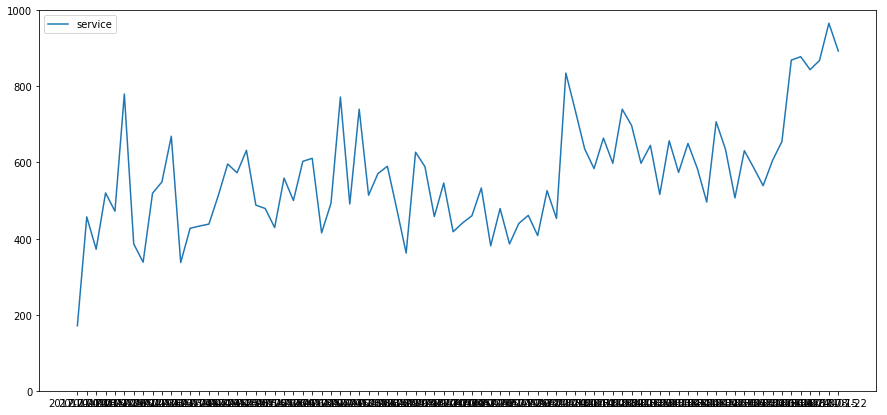

In [30]:
plot_words(0,1, fmt='-')

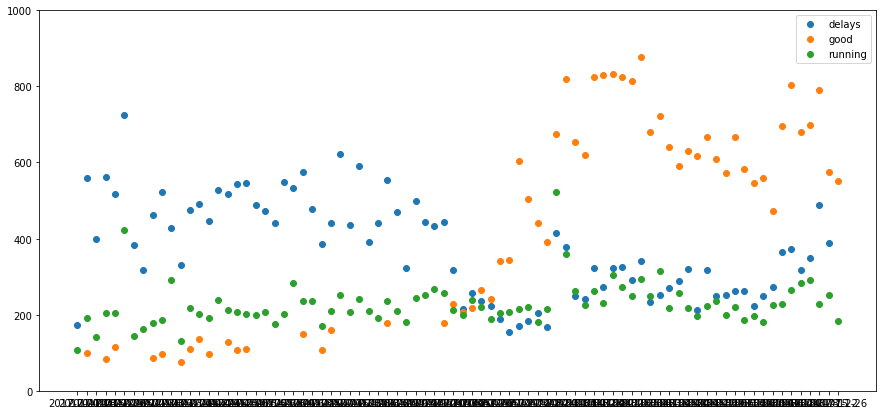

In [31]:
plot_words(1,4, fmt='o')

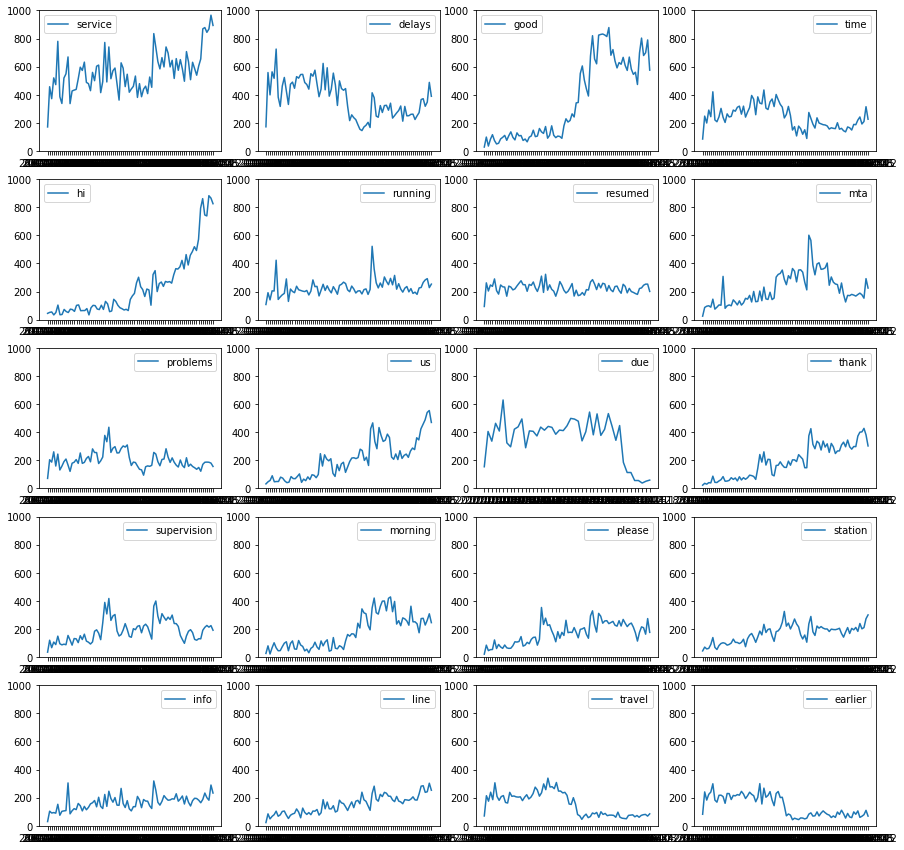

In [32]:
plt.figure(figsize=(15,15))
for n in range(20):
    plt.subplot(5,4,n+1)
    plot_words(n,n+1, fmt='-', data=top100, fig=False)

In [33]:
dates = top100.loc[:,'date'].unique()

In [61]:
# regplot of words from vectorized tweets
# i'th to j'th word OR whatever you put in 'words'
# (doesn't currently deal with words that aren't in the data)
# 'data' is data
# use 'fig' if u just want one plot (v. if ur doin a bunch of these)
# 'lim' is max ylim of plot
# 'line' puts vertical line at x='line' (or nothing if False)
# 'fit' controls regression line in the regplot
#
# the fancy 'counts' wrangling is mostly to fill out the index for any null values in the data

def sns_words(i=0, j=3, words=None, data=top100, fig=True, lim=1000, line=False, fit=True):

    if words is not None:
        if type(words) == str:
            word_list = [words]
        else:
            word_list = words
    else:
        word_list = []
        for w in data.groupby('word').sum().sort_values('count', ascending=False).iloc[i:j].reset_index()['word']:
            word_list.append(w)
    dates = data.loc[:,'date'].unique()
    if fig:
        fig = plt.figure(figsize=(15,7))
    for w in word_list:
        d = data[data['word'] == w].sort_values('date')
        counts = {'date':[], 'count':[]}
        for d1 in dates:
            counts['date'].append(d1)
            if d.loc[:,'date'].str.contains(d1).sum() > 0:
                counts['count'].append(d[d['date'] == d1]['count'].values[0])
            else:
                counts['count'].append(0)
        plot_df = pd.DataFrame(counts).reset_index()
        sns.regplot(
            data=plot_df, x='index', y='count', fit_reg=fit, scatter_kws=({'alpha':0.5, 'color':'orange'}))
    if line is not False:
        plt.axvline(x=line, linestyle=':')
    plt.legend(labels=word_list)
    plt.ylim(0,lim)
    plt.xlim(0,83)
#     plt.xticks([])
    plt.xlabel('');

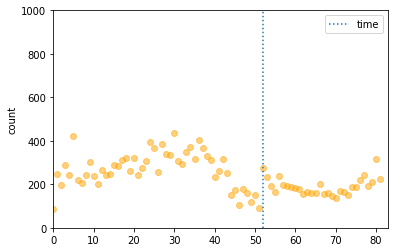

In [59]:
sns_words(3,4, fig=False, line=52, fit=False)

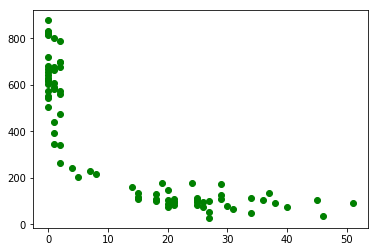

In [71]:
plt.plot(top300[top300['word']=='good']['count'], 'go')

In [60]:
# a 3x3 subplot of sns_words for i=i*9, j=(i*9)+9
# 'line' 'lim' and 'fit' are are passed to sns_words
# 'fit' is 52 because that's 1/1/2018

def reg9(i, data=top300, lim=1000, line=52, fit=True):
    plt.figure(figsize=(15,15))
    j = i*9
    for n in range(9):
        plt.subplot(3,3,n+1)
        sns_words(j+n,j+n+1, data=data, fig=False, lim=lim, line=line, fit=fit)

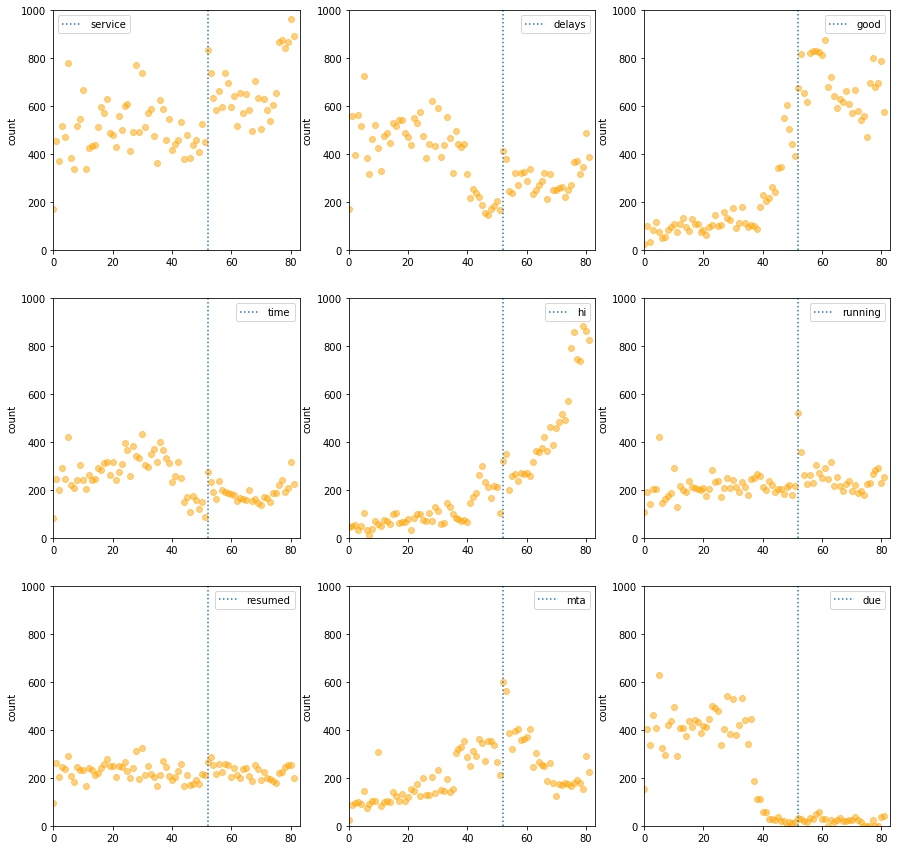

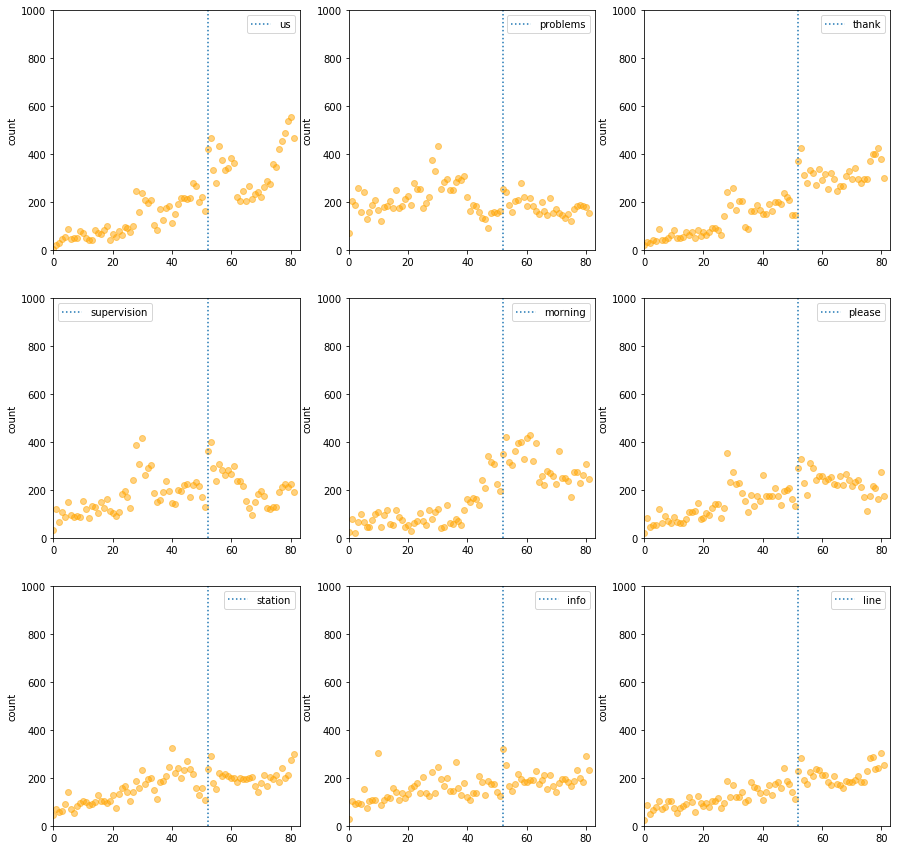

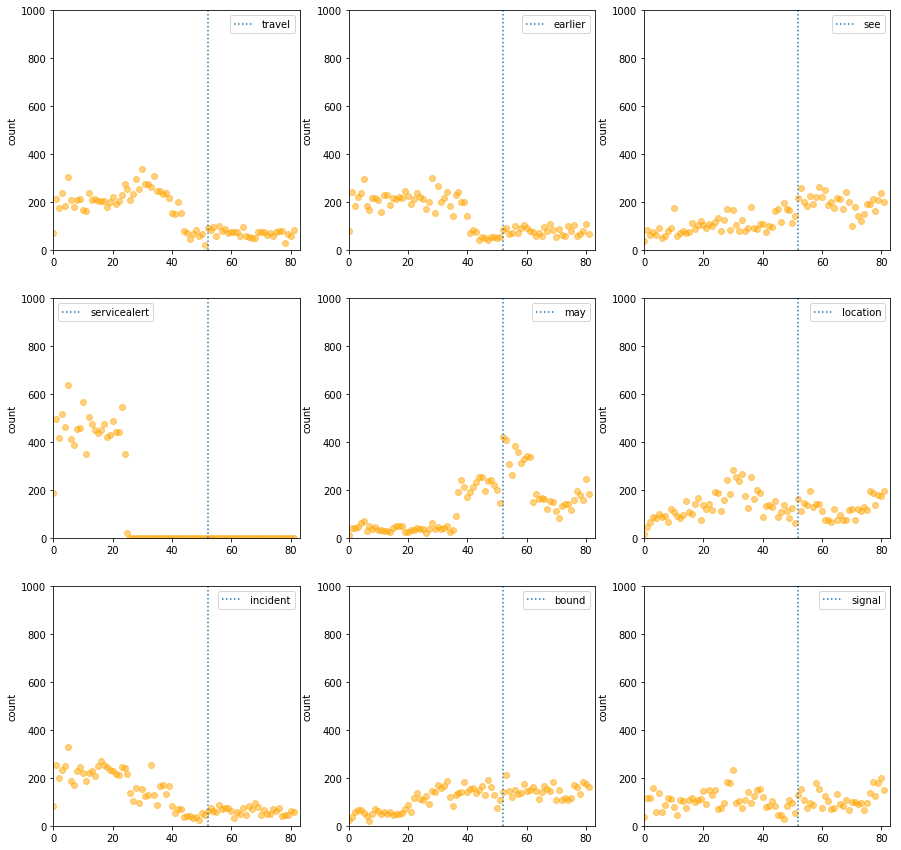

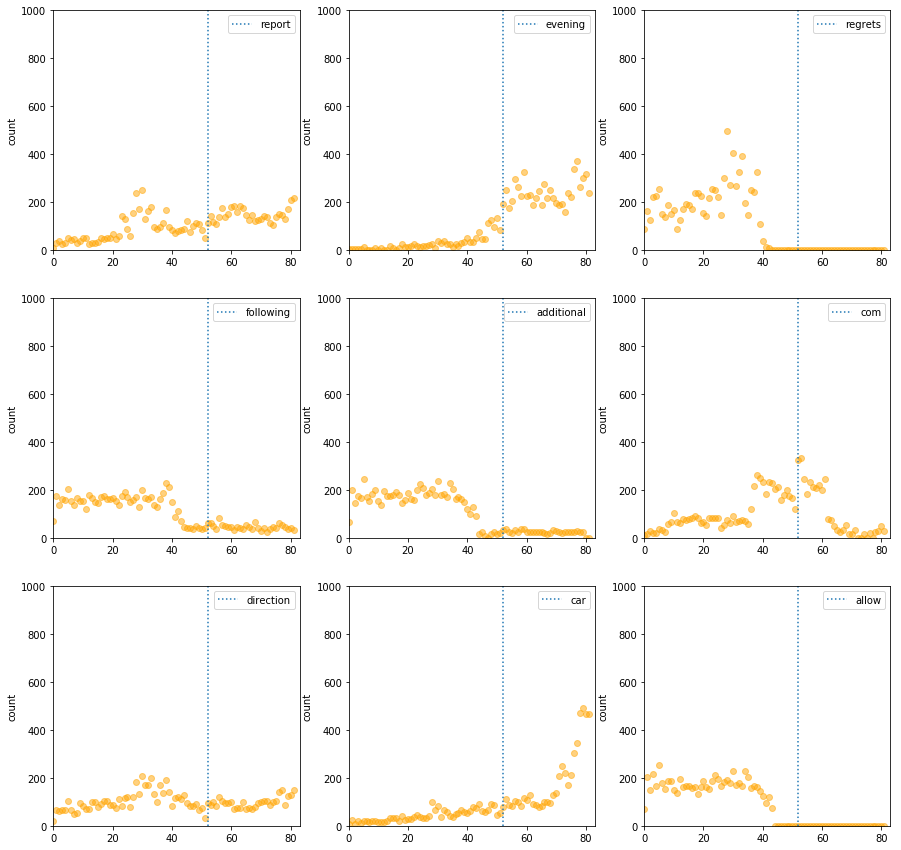

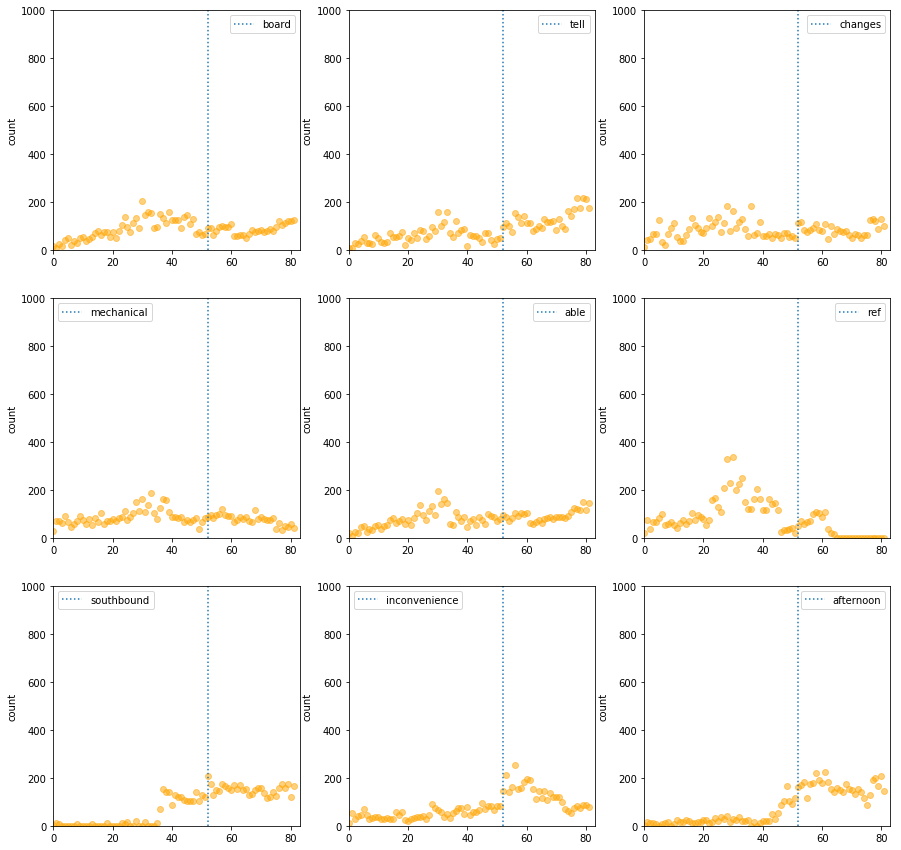

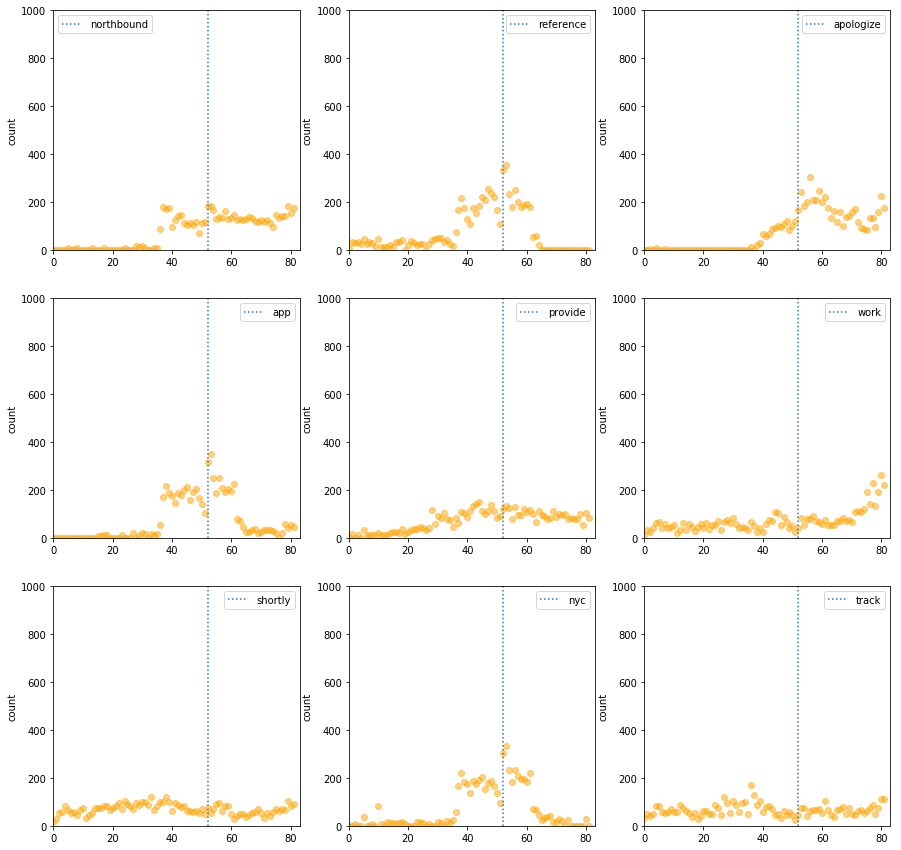

In [64]:
for n in range(6):
    reg9(n, fit=False)

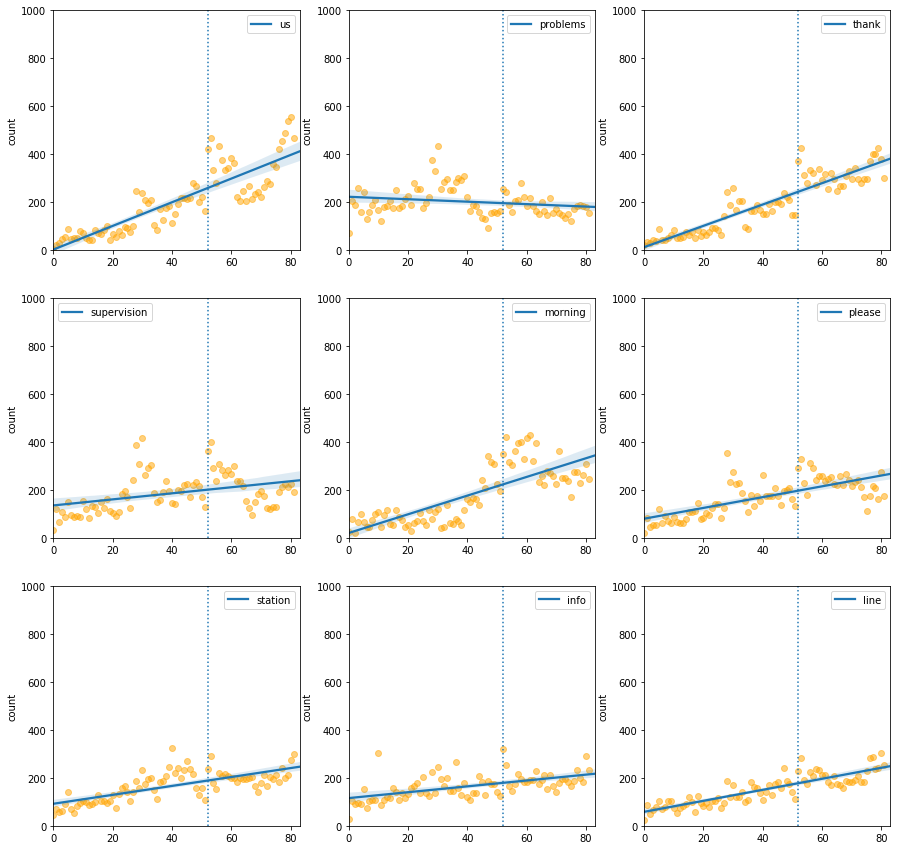

In [38]:
reg9(1)

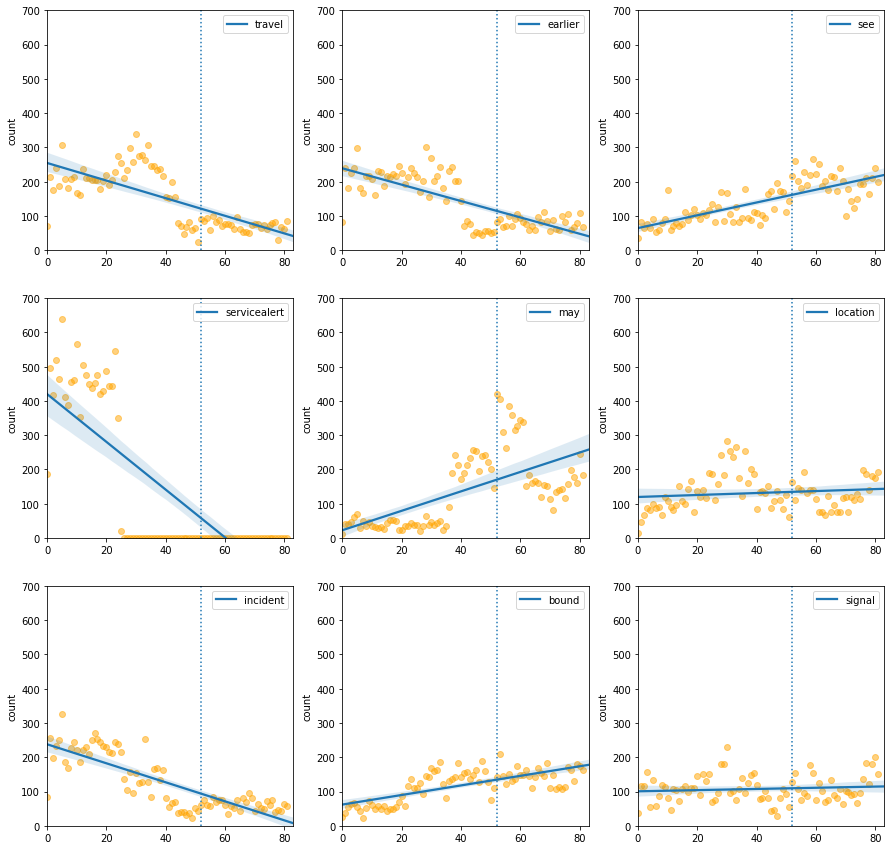

In [39]:
reg9(2, lim=700)

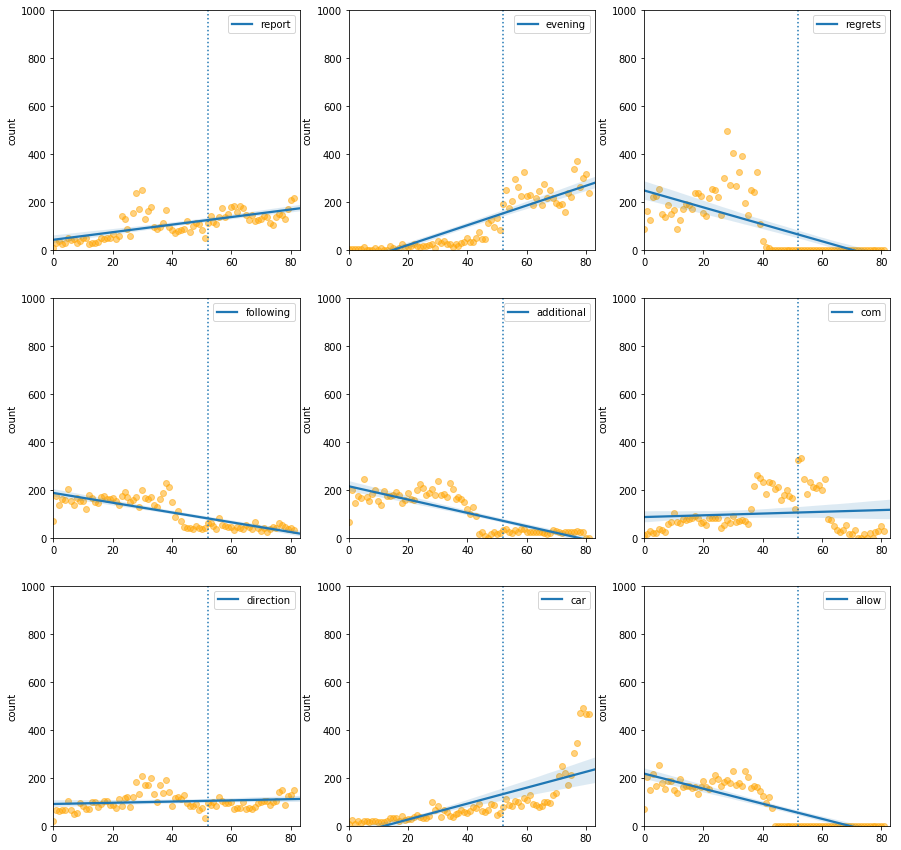

In [40]:
reg9(3)

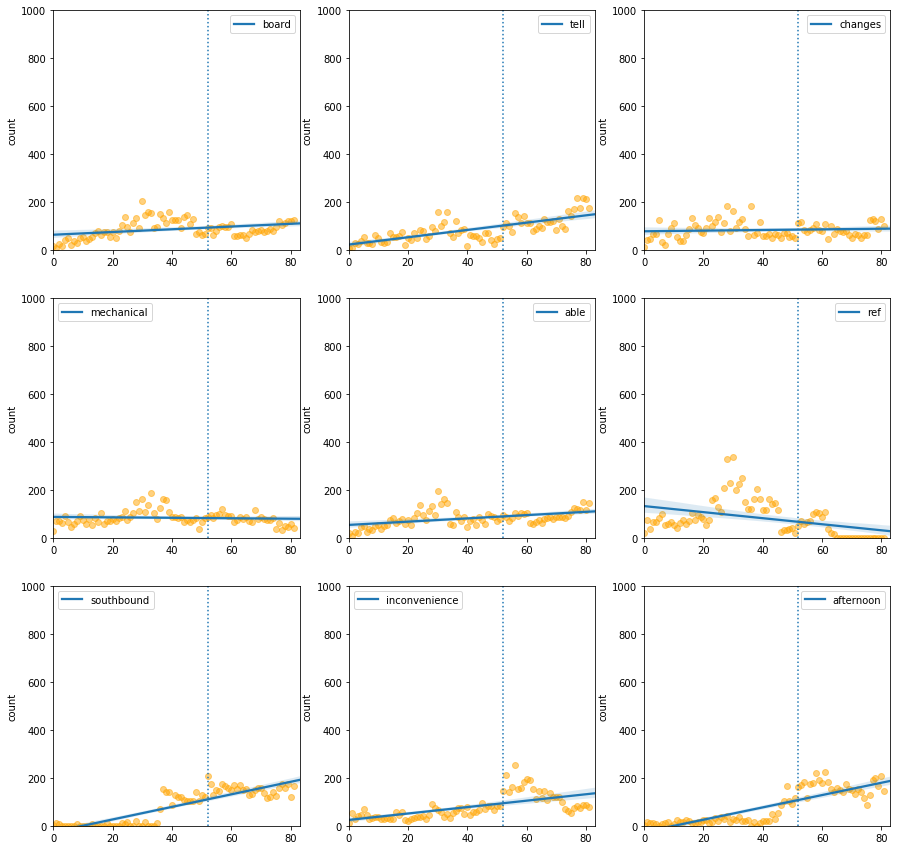

In [63]:
reg9(4, lim=1000)

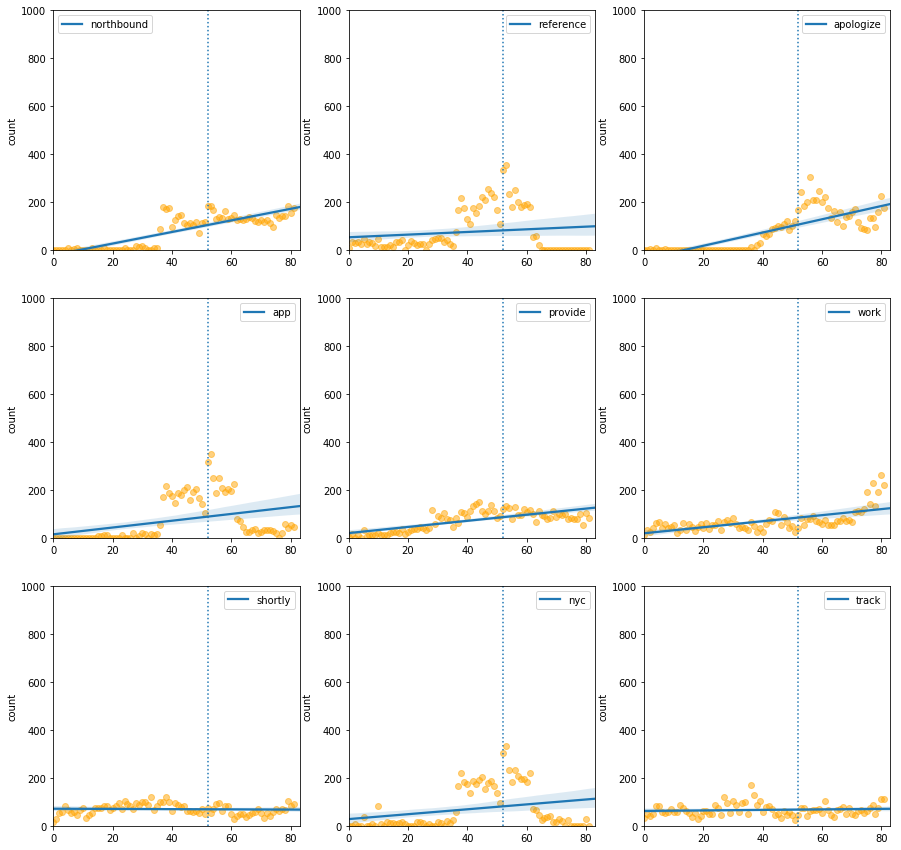

In [42]:
reg9(5)

In [43]:
top100.head()

,word,count,date
0,servicealert,188,2017-01-01
1,delays,172,2017-01-01
2,service,171,2017-01-01
3,due,154,2017-01-01
4,running,108,2017-01-01


In [44]:
top100.groupby('word').sum().sort_values('count', ascending=False).iloc[0:25].reset_index()['word']

0          service
1           delays
2             good
3             time
4               hi
5          running
6          resumed
7              mta
8         problems
9               us
10             due
11           thank
12     supervision
13         morning
14          please
15         station
16            info
17            line
18          travel
19         earlier
20             see
21    servicealert
22             may
23        location
24        incident
Name: word, dtype: object

In [45]:
data=top300
w = 'servicealert'
data[data['word'] == w].sort_values('date')

,word,count,date
0,servicealert,188,2017-01-01
1,servicealert,496,2017-01-08
0,servicealert,418,2017-01-15
2,servicealert,519,2017-01-22
2,servicealert,464,2017-01-29
2,servicealert,640,2017-02-05
0,servicealert,411,2017-02-12
0,servicealert,388,2017-02-19
2,servicealert,454,2017-02-26
2,servicealert,460,2017-03-05


In [46]:
d = data[data['word'] == 'servicealert']

In [47]:
d.shape

(26, 3)

In [48]:
counts = {'date':[], 'count':[]}
for d1 in dates:
    counts['date'].append(d1)
    if d['date'].str.contains(d1).sum() > 0:
        counts['count'].append(d[d['date'] == d1]['count'].values[0])
    else:
        counts['count'].append(0)

In [49]:
pd.DataFrame(counts)

,count,date
0,188,2017-01-01
1,496,2017-01-08
2,418,2017-01-15
3,519,2017-01-22
4,464,2017-01-29
5,640,2017-02-05
6,411,2017-02-12
7,388,2017-02-19
8,454,2017-02-26
9,460,2017-03-05


In [50]:
dates

array(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
       '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
       '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
       '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
       '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14',
       '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11',
       '2017-06-18', '2017-06-25', '2017-07-02', '2017-07-09',
       '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06',
       '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03',
       '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
       '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
       '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26',
       '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24',
       '2017-12-31', '2018-01-07', '2018-01-14', '2018-01-21',
       '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18',
       '2018-02-25', '2018-03-04', '2018-03-11', '2018-

In [51]:
df2[df2['sig'] == '^JZ']

,date,retweets,favorites,text,mentions,hashtags,id,permalink,tweet_clean,polarity,subjectivity,sig,log_rt,log_faves
0,2018-08-01 19:52:00,0,0,Good Evening. We are working to address these ...,NaN,NaN,1.024805e+18,https://twitter.com/NYCTSubway/status/10248050...,good evening. we are working to address these ...,0.700000,0.600000,^JZ,0.0,0.0
1,2018-08-01 19:49:00,0,0,Good Evening. Can you tell us your location an...,NaN,NaN,1.024804e+18,https://twitter.com/NYCTSubway/status/10248044...,good evening. can you tell us your location an...,0.700000,0.600000,^JZ,0.0,0.0
2,2018-08-01 19:39:00,0,0,Thank you for reporting this information. We w...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248017...,thank you for reporting this information. we w...,0.000000,0.000000,^JZ,0.0,0.0
3,2018-08-01 19:38:00,0,0,You're very welcome and I hope you have a grea...,NaN,NaN,1.024802e+18,https://twitter.com/NYCTSubway/status/10248015...,you're very welcome and i hope you have a grea...,0.900000,0.875000,^JZ,0.0,0.0
4,2018-08-01 19:36:00,0,0,Thank you again for reporting this. We will at...,NaN,NaN,1.024801e+18,https://twitter.com/NYCTSubway/status/10248010...,thank you again for reporting this. we will at...,0.800000,0.750000,^JZ,0.0,0.0
6,2018-08-01 19:29:00,0,0,Good Evening. We understand your frustration a...,NaN,NaN,1.024799e+18,https://twitter.com/NYCTSubway/status/10247993...,good evening. we understand your frustration a...,0.600000,0.550000,^JZ,0.0,0.0
9,2018-08-01 19:16:00,0,0,Good Evening. There are no reported delays at ...,NaN,NaN,1.024796e+18,https://twitter.com/NYCTSubway/status/10247959...,good evening. there are no reported delays at ...,0.600000,0.550000,^JZ,0.0,0.0
11,2018-08-01 19:13:00,0,0,Thank you for this information. Were you able ...,NaN,NaN,1.024795e+18,https://twitter.com/NYCTSubway/status/10247952...,thank you for this information. were you able ...,0.500000,0.625000,^JZ,0.0,0.0
15,2018-08-01 18:58:00,0,0,Good Evening. There was an earlier incident in...,NaN,NaN,1.024791e+18,https://twitter.com/NYCTSubway/status/10247914...,good evening. there was an earlier incident in...,0.166667,0.466667,^JZ,0.0,0.0
17,2018-08-01 18:54:00,0,0,Good Evening. There is planned work on the lin...,NaN,NaN,1.024791e+18,https://twitter.com/NYCTSubway/status/10247906...,good evening. there is planned work on the lin...,0.350000,0.300000,^JZ,0.0,0.0


In [52]:
df2.shape

(149072, 14)